# Ayudantía 2

## OOP, Herencia, Clases Abstractas y Polimorfismo   


_Formulario de feedback:_ https://goo.gl/forms/aFpTe9LGx9ObcMBu1
  

**Autores: Irina Salazar y Nicolás Quiroz**

# OOP: Programación Orientada a Objetos

_Es un paradigma de programación basado alrededor de clases de programación y ejemplos de clases llamadas objetos._

## KHÉ

Básicamente, es una forma de programar :) 

# Recordemos un poco de Intro :)

- ¿Qué es una clase?
- ¿Qué es un objeto?

## Objetos

- Entidades de ejecución básicas.
- Instancias de una clase.

## Clase

- Grupo de objetos de tipo similar.

## Forma básica para crear una clase

In [3]:
class MiClase:
    
    # Atributos que recibo para crear mi clase
    def __init__(self, atributo1, atributo2):
        # Mis atributos
        self.mi_at1 = atributo1
        self.mi_at2 = atributo2
        self.mi_at3 = []
        
    def mi_metodo1(self):
        # Contenido de funcion
        return
    
    def mi_metodo2(self, argumento1, argumento2=None):
        # Contenido de funcion
        return

# Properties
### Explicado muy velozmente :D

Permiten obtener un atributo cuyo valor es dinámico, o con restricciones de privacidad.

In [8]:
class Jugador:
    def __init__(self, nombre):
        self.nombre = nombre
        self.__vida = 100
        self.__mana = 100
    
    @property
    def vida(self):
        return self.__vida
    
    @vida.setter
    def vida(self, value):
        self.__vida = min(100, max(0, value))
    
    @property
    def mana(self):
        return self.__mana

# Herencia

Nos permite representar la relación del tipo:  
_"el objeto B es un objeto A pero con algunas diferencias"._

- Clase hija hereda datos y comportamientos de la clase madre.
- Especialización de una clase.
- Sobreescritura de métodos.
- Agregar más información.

## ¿Cómo se hereda de una clase a otra?

In [4]:
# Clase Madre
class Estudiante:
    def __init__(self, nombre, gen, major=None):
        self.nombre = nombre
        self.generacion = gen
        self.major = major
        self.amigos = []
    
# Clase Hija
class EstudianteDePregrado(Estudiante):
    def __init__(self, nombre, gen, major, lista_hobbies):
        super().__init__(nombre, gen, major)
        self.lista_hobbies = lista_hobbies
        

# Multiherencia

Una clase puede heredar atributos y métodos de más de una clase.

Supongamos tenemos que modelar la clase `Condor`. Este sería un `Carronero` y `AnimalVolador`.

In [ ]:
class Carronero:
    def comer_muerto(self):
        print('Om nom nom')
class AnimalVolador:
    def volar(self):
        print('Fium!')

class Condor(Carronero, AnimalVolador):
    def __init__(self):
        super().__init__()

## El problema del diamante

<img src="image.png" alt="image"  width="45%" height="45%"/>


La colisión de herencia puede ser un problema

Solucion?

*No hay*

😂 Si hay! **`super()`**!

In [6]:
class Primero:
    def __init__(self, mensaje1='', **kwargs):
        self.m1 = mensaje1
    def foo(self):
        print(self.m1)

In [8]:
class Segundo(Primero):
    def __init__(self, mensaje1='', mensaje2='', **kwargs):
        super().__init__(mensaje1)
        self.m2 = mensaje2

    def foo(self):
        super().foo()
        print(self.m2)

class Tercero(Primero):
    def __init__(self, mensaje1='', mensaje3='', **kwargs):
        super().__init__(mensaje1)
        self.m3 = mensaje3

    def foo(self):
        super().foo()
        print(self.m3)

Y el cuarto?

```python
class Cuarto(Segundo, Tercero):
    def __init__(self, que_rayos_pongo_aqui):
        pass
```

In [9]:
class Cuarto(Segundo, Tercero):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.m4 = args

    def foo(self):
        super().foo()
        print(''.join(self.m4))
ctr = Cuarto(mensaje1='Helou', mensaje2='Ciao', mensaje3='Ogbua!')
ctr.foo()

Helou

Ciao



# Polimorfismo

_Clases que tienen métodos y/o atributos iguales, pero que se comportan de forma distinta._  
  
Tal vez se entienda mejor con el ejemplo :)

- **Overriding:** 
- **Overloading:**

- **Overriding:** cuando se implementa un método en una subclase que "invalida" la implementación del mismo método en la super clase.  
_Básicamente es sobreescribir un método de la clase Madre en la clase Hija para que funcione de distinta forma_.  

- **Overloading:** definir un método con el mismo nombre pero con distinto número y tipo de argumentos.  
_Python no soporta function overloading!!!!_


## Veamos un ejemplito :D

In [13]:
class EstudianteNormal:
    def epoca_de_ies(self):
        print('Debería haber empezado a estudiar antes :O')
        
class EstudianteZen(EstudianteNormal):
    def epoca_de_ies(self):
        print('Todo va a estar bien :) Estudie con anticipación')

class EstudianteEnPanico(EstudianteNormal):
    def epoca_de_ies(self):
        print('AAAYUUUUUDAAAAAAA!!!!')

Nico = EstudianteNormal()
Feña = EstudianteZen()
Iri = EstudianteEnPanico()
print(Nico.epoca_de_ies)
print(Feña.epoca_de_ies)
print(Iri.epoca_de_ies)
### Pregunta: Por qué se imprime eso? :O

<bound method EstudianteNormal.epoca_de_ies of <__main__.EstudianteNormal object at 0x108d2dc50>>
<bound method EstudianteZen.epoca_de_ies of <__main__.EstudianteZen object at 0x108d2dd68>>
<bound method EstudianteEnPanico.epoca_de_ies of <__main__.EstudianteEnPanico object at 0x108d2d1d0>>


In [14]:
print(Nico.epoca_de_ies())
print(Feña.epoca_de_ies())
print(Iri.epoca_de_ies())
### Pregunta: Por qué imprime 3 veces None?

Debería haber empezado a estudiar antes :O
None
Todo va a estar bien :) Estudie con anticipación
None
AAAYUUUUUDAAAAAAA!!!!
None


In [15]:
Nico.epoca_de_ies()
Feña.epoca_de_ies()
Iri.epoca_de_ies()

Debería haber empezado a estudiar antes :O
Todo va a estar bien :) Estudie con anticipación
AAAYUUUUUDAAAAAAA!!!!


## Caso especial: _duck typing_

_If it walks like a duck and quacks like a duck then it is a duck._

In [16]:
# Ejemplo de los contenidos
class Pato:
    def gritar(self):
        print("Quack!")
    def caminar(self):
        print("caminando como un pato...")        
    
class Persona:
    def gritar(self):
        print("Ahhh!")
    def caminar(self):
        print("caminando como un humano...")        

def activar(pato):
    pato.gritar()
    pato.caminar()

donald = Pato()
juan = Persona()
activar(donald)
activar(juan)

Quack!
caminando como un pato...
Ahhh!
caminando como un humano...


# Clases abstractas

- Objetivo: ahorrarnos escribir una y otra vez métodos y atributos que se repiten en las subclases.
- Deben instanciarse las subclases, no las clases abstractas.
- Hay métodos normales (clase abstracta) y métodos abstractos (se implementan en cada subclase).

In [24]:
# Ejemplo de los contenidos
from abc import ABCMeta, abstractmethod

class Base(metaclass=ABCMeta):
    @abstractmethod
    def func_1(self):
        print('holahola')

    @abstractmethod
    def func_2(self):
        print('adiosadios')

class SubClase(Base):
    
    def func_1(self):
        print('hola')

    def func_2(self):
        print('adios')

        
# Juguemos con las posibilidades: salir de pantalla completa
c = SubClase()
c.func_1()
c.func_2()

hola
adios


# Diagrama de clases

- Se compone de **clases** y **relaciones**.

Foto del material del estudio entregado.

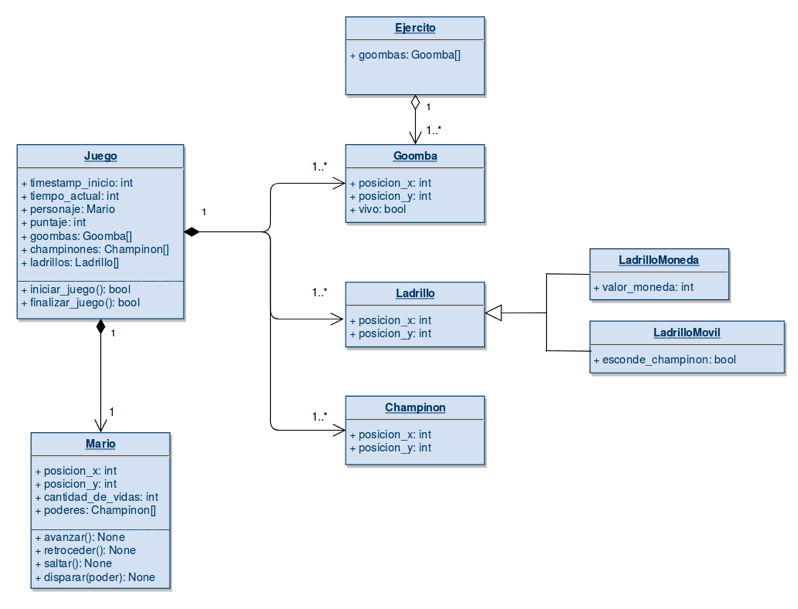

# [AC05 2018-2](https://github.com/IIC2233/syllabus-2018-2/blob/master/Actividades/AC05/Enunciado.pdf)

Cuando Billis, el dios de la destrucción, llega a la Tierra para destruirla, la pandilla DragonCCball invoca a los poderosos supersaiyayines para detenerlo. Para que esta pandilla pueda simular quién ganará la batalla, Magnum, miembro jefe, le pide a los estudiantes de Programación Avanzada que realicen una modelación de la batalla que se realizará entre los Billis y los supersaiyayines.

**Pro tip**(_el primero es gratis_): Buscar, si el caso lo amerita, por clases abstractas!

## Personajes
**Humano**: Ellos son los habitantes originarios del planeta Tierra. Por lo general, tienen un _ki_ bajo, pero esto es compensado gracias a su inteligencia. A menos que se especifique, la inteligencia de un humano cualquiera tiene el valor de 100. Esta especie ha llegado a controlar la mayor parte del universo conocido. Además los humanos pueden incrementar su _ki_ meditando.

**Extraterrestre**: Como su nombre lo indica, estos son los seres que no son originarios de la Tierra. Tienen la particularidad de que, al atacar, aumentan su fuerza, por lo que con cada ataque se vuelven más poderosos.

**Supersaiyayin**: Ellos son los _buenos_ de la batalla y se caracterizan por ser una mezcla entre humanos y extraterrestres. Tienen apariencia humana, pero poseen una cola; cuando la pierden su resistencia disminuye en un 60\%. Son poderosos, pues su parte extraterrestre es la que predomina cuando atacan.

**Hakashi**: Estos extraterrestres son los entes _malévolos_ de la galaxia. Su ventaja durante una batalla radica en que tienen la habilidad de robar el _ki_ de sus oponentes.

## Funciones

 - Para los **humanos**:
 
`def atacar(self, enemigo)`: Este ataque le quita a la vida del enemigo.
        $$ 
        \text{pérdida de vida} \\= ki \times \frac{(1 + \text{fuerza_atacante} - \text{resistencia_enemigo})}{2} $$
        
Deberá imprimir en pantalla el daño que se le hizo al enemigo, de la siguiente manera:
        
`"{nombre_atacante} le quita {vida_perdida} de vida a {enemigo_nombre}"`
    

        
`def meditar(self)`: Cada vez que se invoca, mejora el _ki_ del personaje según la fórmula:
$$\Delta ki = \frac{\text{inteligencia}}{100}$$
        
Deberá imprimir en pantalla `"Yo {nombre} estoy meditando!"`.

- Para los **extraterrestres**:

`def atacar(self, enemigo)`: Este ataque le quita a la vida del enemigo:
        
$$  \text{pérdida de vida} \\= ki \times (1 + \text{fuerza_atacante} - \text{resistencia_enemigo}) $$
        
Además, al atacar aumentan su fuerza en un 30\%. Se deberá mostrar en pantalla el daño que se le hizo al enemigo, de la siguiente manera:

`"{nombre_atacante} le quita {vida_perdida} de vida a {enemigo_nombre}"`

- Para los **supersaiyayines**:

`def perder_cola(self)`: El _supersaiyayin_ pierde su cola y su resistencia disminuye en un 60%.

- Para los **hakashis**:

`def robar_ki(self, adversarios)`: Esta función recibe una cantidad arbitraria de seres que posean _ki_ y le quita el 50% del _ki_ a estos, quedándose con el _ki_ robado.

In [1]:
from abc import ABC, abstractmethod

# IMPORTANTE: La clase abstracta Ser hereda de ABC. 
# Esto es para que no se instancien objetos de una clase abstracta.
# SI es necesario hacer super().__init__(*args, **kwargs)

class Ser(ABC):
    def __init__(self, nombre, fuerza, resistencia, ki, vida,
                 *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.nombre = nombre
        self.fuerza = fuerza
        self.resistencia = resistencia
        self.ki = ki
        self._vida = vida

    @property
    def vida(self):
        return self._vida
    
    # Recordar que vida es una property para poder controlar
    # automaticamente (con el .setter) el valor minimo que 
    # puede tomar.
    
    @vida.setter
    def vida(self, value):
        self._vida = max(value, 0)

    # Recordar que los metodos abstractos deben ser 
    # reescritos en las clases hijas no abstractas.
    @abstractmethod
    def atacar(self, enemigo):
        pass


class Humano(Ser):

    def __init__(self, *args, inteligencia=100, **kwargs):
        super().__init__(*args, **kwargs)
        self.inteligencia = inteligencia

    def meditar(self):
        self.ki += self.inteligencia / 100
        print(f"Yo {self.nombre} estoy meditando!")

    def atacar(self, enemigo):
        daño = self.ki * (1 + self.fuerza - enemigo.resistencia) / 2
        enemigo.vida -= daño
        print(f"{self.nombre} le quita {daño} de vida a {enemigo.nombre}")


class Extraterrestre(Ser):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def atacar(self, enemigo):
        daño = self.ki * (1 + self.fuerza - enemigo.resistencia)
        enemigo.vida -= daño
        print(f"{self.nombre} le quita {daño} de vida a {enemigo.nombre}")
        self.fuerza *= 1.3


# Supersaiyayin y Hakashi no tienen metodo atacar porque
# lo heredan de sus clases madres.

class Supersaiyayin(Extraterrestre, Humano):
    # En este caso, se hereda el método atacar
    # de la clase que esta escrita primero. 
    # Entonces Supersaiyayin ataca como un ET.
    # Pueden verificarlo en el print que hay al
    # final del código.
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._tiene_cola = True

    def perder_cola(self):
        if not self._tiene_cola:
            return

        self._tiene_cola = False
        self.resistencia *= 0.4


class Hakashi(Extraterrestre):

    def robar_ki(self, adversarios):
        ki_robado = 0.5 * sum(adversario.ki for adversario in adversarios)
        self.ki += ki_robado

        for adversario in adversarios:
            adversario.ki *= 0.5


if __name__ == '__main__':
    # Instanciamos los personajes pedidos
    yamcha = Humano(
        nombre="Yamcha", resistencia=0.2, fuerza=0.3, vida=500, ki=10,
        inteligencia=50)
    johnny = Supersaiyayin(
        nombre="Johnny", resistencia=0.4, fuerza=0.6, vida=900, ki=20,
        inteligencia=30)
    chaobug = Supersaiyayin(
        nombre="Chaobug", resistencia=0.7, fuerza=0.5, vida=1000, ki=30,
        inteligencia=20)
    popa = Hakashi(
        nombre="Popa", resistencia=0.6, fuerza=0.4, vida=500, ki=20)
    billis = Hakashi(
        nombre="Billis", resistencia=0.8, fuerza=0.9, vida=1000, ki=20)
    
    print(chaobug.atacar)


<bound method Extraterrestre.atacar of <__main__.Supersaiyayin object at 0x1023f5048>>


## No olviden responder el [feedback](https://goo.gl/forms/aFpTe9LGx9ObcMBu1)!
# Gracias